# LCT GPT Experiment Workbench
The aim of this notebook is to provide researchers an experiment workbench to finetune and optimise LLM prompts and to evaluate their performance on a set of examples. For this project the LLM (default: OpenAI GPT-3.5) objective is to detect and to identify the sequencing types of combination of passages (clauses). The researcher can use this notebook to optimise LLM response, which is generated based on the following three components (see `Schema and Input data` below):
- LCT definitions (editable): optimised by researcher in LCT definition file (example file: `sequencing_types.xlsx`).
- LCT examples with LCT classes, linkage words and reasoning (editable): examples can be removed, added, or edited by reseacher in example file (example file: `sequencing_examples_2clauses.xlsx`).
- Prompt parsing instuctions (partially editable): Can be optimised, but should be taken with care since correct output parsing instructions are crucial to extract results (file: `instruction_prompt.txt`).

The files are stored in the folder `schemas`. You can find this folder in the parent folder of this notebook. If you edit these files it is recommended to make a copy of the example file first, and to give it a unique name for version control.

## Installation 

Not required if you are running this notebook on Binder. If you run this notebook locally or on your own host environment (e.g. Colab, JupyterLab), you need to install the Python dependencies first (recommend to setup a virtual Python environment first). To install the dependencies, uncomment and run the commands in the following cell.

In [ ]:
# !git clone https://github.com/Sydney-Informatics-Hub/LCT_sequencing
# %cd LCT_sequencing
# %pip install -r requirements.txt

## Import dependencies

This assumes you have a copy of the repo in your parent directory including the folder "tools".

In [1]:
# Add package libraries in folder tools
import sys
sys.path.insert(1, '../tools')
from load_schema_json import load_json, validate_json, json_to_dataframe
from utils_llm import LLM, openai_apikey_input
from excel_json_converter import excel_to_json

#to open notebook in interactive mode, uncomment followin line
#init_notebook_mode(all_interactive=True)

## Schema and Input data

Define locations of files for sequencing types, instruction prompts, and examples.

In [2]:
# Path to output folder (if not existing, it will be created)
outpath = "./results/"

# Path to schemas and excel files for definitions and examples:
path_schema = "../schemas/"

# Filename for examples (.json or .xlsx), assume to be in folder path_schema:
filename_examples = "sequencing_examples_2clauses.xlsx"

# Filename for sequencing definitions (.json or .xlsx), assumed to be in folder path_schema:
filename_definitions = "sequencing_types.xlsx"

# if you want to select manually examples from the example table (filename_examples), select indices here as list
# Ideally you want to select at least one example per sequencing type.
# Note that indices count start with 0, not the excel row number, e.g.:
# list_prompt_indices = [0,1,7,14,23,26,30,33]
# Alternatively set None or empty list. In this case a random selection of examples will be used
list_prompt_indices = None

# Filename for prompt instructions
filename_zero_prompt = "instruction_prompt.txt"

# Filename for json schema valdiation ()
filename_schema = "schema_sequencing_examples_reason.json"

## OpenAI Authentication

Authentication with your OpenAI API key for GPT usage (default model: GPT-3.5).
Note that this will incur charges on your OpenAI account.
The widget below allows you to enter your password string using an obfuscated text input box.

In [3]:
openai_apikey_input()

Row
    [0] PasswordInput(name='Enter your OpenAI A..., placeholder='<OpenAI API Key>')
    [1] Markdown(str)

## Run experiment pipeline

The experiment pipeline includes the following main steps:
- load examples and LCt type definitions from files
- split examples in prompt and test samples
- generate prompt string from LCT type definitions and prompt examples
- call OpenAI API for completion of prompt for each test sample
- save prompt and response to file for each sample
- save combined results to csv file
- evaluate results and save evaluation metrics to file

All output files are saved in the output path folder as specified above.

In [5]:
import experiment as ex
df_results, outpath_exp, seq_classes = ex.run_pipe(
        outpath = outpath, 
        path_schema = path_schema, 
        filename_examples = filename_examples, 
        filename_schema = filename_schema, 
        filename_definitions = filename_definitions, 
        filename_zero_prompt = filename_zero_prompt, 
        list_prompt_indices = list_prompt_indices)

LLM initialized.
Test sample 0 of 26
Test class: Coherent Sequencing | Prediction: COH | Probability: 0.729 | Used tokens: 3199 
Test sample 1 of 26
Test class: Coherent Sequencing | Prediction: INT | Probability: 0.455 | Used tokens: 3198 
Test sample 2 of 26
Test class: Coherent Sequencing | Prediction: CON | Probability: 0.711 | Used tokens: 3289 
Test sample 3 of 26
Test class: Consequential Sequencing | Prediction: CON | Probability: 0.817 | Used tokens: 3229 
Test sample 4 of 26
Test class: Consequential Sequencing | Prediction: CON | Probability: 0.901 | Used tokens: 3301 
Test sample 5 of 26
Test class: Consequential Sequencing | Prediction: CON | Probability: 0.496 | Used tokens: 3258 
Test sample 6 of 26
Test class: Consequential Sequencing | Prediction: CON | Probability: 0.673 | Used tokens: 3268 
Test sample 7 of 26
Test class: Consequential Sequencing | Prediction: CON | Probability: 0.806 | Used tokens: 3271 
Test sample 8 of 26
Test class: Consequential Sequencing | Pre

### Show results table for all samples

The results table (see also`results_gpt-3.5-turbo-instruct.csv`) provides for each sample:
- the string for each test sample (and additional split up in the two text clauses or chunks)
- ground truth classification (test_class)
- ground truth linkage word (test_linkage)
- classification predicted by the model (pred_class)
- probability of the predicted classification (pred_class_prob)
- predicted linkage_word (pred_linkage)
- filenames for prompt and response files of GPT as saved in output directory
- number of total tokens used for each sample
- the modelname and version
- the GPT reasoning for the predicted class



In [6]:
df_results

,test_str,test_chunk1,test_chunk2,test_class,test_linkage,pred_class,pred_class_prob,pred_linkage,prompt_id,filename_prompt,filename_response,tokens,modelname_llm,reasoning
0,you’ve got a written source and you’ve got a p...,you’ve got a written source,you’ve got a picture source,Coherent Sequencing,and,COH,0.728732,and,cmpl-8Fd3ylcZ16erF0qS64CNs8Iu03RUs,prompt_cmpl-8Fd3ylcZ16erF0qS64CNs8Iu03RUs.txt,response_cmpl-8Fd3ylcZ16erF0qS64CNs8Iu03RUs.txt,3199,gpt-3.5-turbo-instruct,The two clauses are connected by the conjuncti...
1,Let us look at the example of element carbon i...,Let us look at the example of element carbon i...,It has 6 electrons.,Coherent Sequencing,None,INT,0.454598,It,cmpl-8Fd40BoQaFt09PyFTQhIhqH5olNkB,prompt_cmpl-8Fd40BoQaFt09PyFTQhIhqH5olNkB.txt,response_cmpl-8Fd40BoQaFt09PyFTQhIhqH5olNkB.txt,3198,gpt-3.5-turbo-instruct,The use of the linkage word 'It' refers back t...
2,hdl inhibits a subset of lipopolysaccharide-st...,hdl inhibits a subset of lipopolysaccharide-st...,it's action is independent of sterol metabolism.,Coherent Sequencing,and,CON,0.711073,and,cmpl-8Fd41AHHaxpJY582VOKXfqGpvhS0R,prompt_cmpl-8Fd41AHHaxpJY582VOKXfqGpvhS0R.txt,response_cmpl-8Fd41AHHaxpJY582VOKXfqGpvhS0R.txt,3289,gpt-3.5-turbo-instruct,The example establishes a cause-and-effect rel...
3,electrons can move to higher energy states by ...,electrons can move to higher energy states,by absorbing energy,Consequential Sequencing,then,CON,0.816572,by,cmpl-8Fd43N7qpuWHYCzpidsy0Fz6Zq14h,prompt_cmpl-8Fd43N7qpuWHYCzpidsy0Fz6Zq14h.txt,response_cmpl-8Fd43N7qpuWHYCzpidsy0Fz6Zq14h.txt,3229,gpt-3.5-turbo-instruct,The example establishes a cause-and-effect rel...
4,There is nothing wrong with going back to your...,There is nothing wrong with going back to your...,because the activities that happened in one ba...,Consequential Sequencing,because,CON,0.901354,because,cmpl-8Fd45KcljI1dg3dJIRljylJcja1RE,prompt_cmpl-8Fd45KcljI1dg3dJIRljylJcja1RE.txt,response_cmpl-8Fd45KcljI1dg3dJIRljylJcja1RE.txt,3301,gpt-3.5-turbo-instruct,The example establishes a cause-and-effect rel...
5,"Do, you know, are the themes of their artwork ...","Do, you know, are the themes of their artwork ...","So it’s saying remember when we started, we s...",Consequential Sequencing,So,CON,0.495833,So,cmpl-8Fd47SjEXIEapuqeczc0w6RLT7dfe,prompt_cmpl-8Fd47SjEXIEapuqeczc0w6RLT7dfe.txt,response_cmpl-8Fd47SjEXIEapuqeczc0w6RLT7dfe.txt,3258,gpt-3.5-turbo-instruct,The linker 'So' indicates a consequence or res...
6,High-Density lipoprotein (hdl) protects the ar...,High-Density lipoprotein (hdl) protects the ar...,"However, recent evidence suggests that hdl mi...",Consequential Sequencing,However,CON,0.672570,However,cmpl-8Fd49BR97mJDtX70qg41vIATz1079,prompt_cmpl-8Fd49BR97mJDtX70qg41vIATz1079.txt,response_cmpl-8Fd49BR97mJDtX70qg41vIATz1079.txt,3268,gpt-3.5-turbo-instruct,The linker 'However' indicates a contrast betw...
7,"if we look at where Italy is, it’s not that fa...","if we look at where Italy is,",it’s not that far from Egypt at this time,Consequential Sequencing,If,CON,0.806231,not,cmpl-8Fd4BAc7ScTCx17ZJIpaJdMkdPVdA,prompt_cmpl-8Fd4BAc7ScTCx17ZJIpaJdMkdPVdA.txt,response_cmpl-8Fd4BAc7ScTCx17ZJIpaJdMkdPVdA.txt,3271,gpt-3.5-turbo-instruct,The example establishes a cause-and-effect rel...
8,"It doesn’t always have to be eight, but atoms ...",It doesn’t always have to be eight,but atoms would like to have eight.,Consequential Sequencing,but,CON,0.744114,but,cmpl-8Fd4DMm5xP5cL0ZHyesZubmmwbxY3,prompt_cmpl-8Fd4DMm5xP5cL0ZHyesZubmmwbxY3.txt,response_cmpl-8Fd4DMm5xP5cL0ZHyesZubmmwbxY3.txt,3235,gpt-3.5-turbo-instruct,The linker 'but' indicates a contrast or count...
9,To identify potential anti-inflammatory mechan...,To identify potential anti-inflammatory mechan...,we challenged macrophages with lipopolysacchar...,Consequential Sequencing,To,CON,0.537175,for,cmpl-8Fd4FDJmWnyRsWZwU9GHdt7z9n2Rq,prompt_cmpl-8Fd4FDJmWnyRsWZwU9GHdt7z9n2Rq.txt,response_cmpl-8Fd4FDJmWnyRsWZwU9GHdt7z9n2Rq.txt,3267,gpt-3.5-tu

### Evaluate and print results stats

This will compute the confusion matrix and the evaluation metrics for the predicted classes by comparing the predicted labels (pred_class) with true labels (test_class). All results are also saved in the output folder. The following metrics are calculated based on the confusion matrix:
- accuracy
- recall
- precision

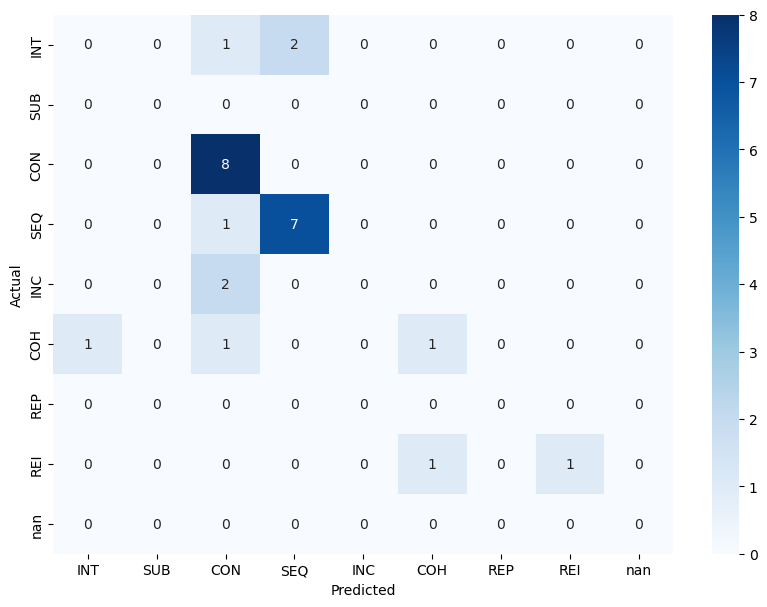

------ Experiment Results ------
accuracy: {'INT': 0.0, 'SUB': nan, 'CON': 1.0, 'SEQ': 0.875, 'INC': 0.0, 'COH': 0.3333333333333333, 'REP': nan, 'REI': 0.5}
recall: {'INT': 0.0, 'SUB': nan, 'CON': 1.0, 'SEQ': 0.875, 'INC': 0.0, 'COH': 0.3333333333333333, 'REP': nan, 'REI': 0.5}
precision: {'INT': 0.0, 'SUB': nan, 'CON': 0.6153846153846154, 'SEQ': 0.7777777777777778, 'INC': nan, 'COH': 0.5, 'REP': nan, 'REI': 1.0}
mean_accuracy: 0.4514
mean_recall: 0.4514
mean_precision: 0.5786
--------------------------------


In [7]:
ex.eval_exp(df_results, outpath_exp, seq_classes)

## Optional: Zip result exp folder for download

In [1]:
# zip via shutil
import shutil
import os
shutil.make_archive(os.path.basename(outpath_exp), 'zip', base_dir = outpath_exp)

NameError: name 'outpath_exp' is not defined